__Note__: Thank you for your interest in my book [Data Science Projects with Python: A case study approach to successful data science projects using Python, pandas, and scikit-learn](https://www.amazon.com/gp/product/1838551026)! This git repo contains all the code referenced in the book. I will periodically update it to make sure it runs with the latest versions of the necessary software. Code cells that are updated from the published text will be noted in comments.

Please see the next cell for the latest versions that are confirmed to work.

Stephen Klosterman

May, 2020

In [4]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
# [Clang 4.0.1 (tags/RELEASE_401/final)].

# The Numpy version is 1.18.1.

# The Pandas version is 1.0.1.

# The Matplotlib version is 3.1.3.

# The Scikit-Learn version is 0.22.1.

The Python version is 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)].

The Numpy version is 2.2.2.

The Pandas version is 2.2.3.

The Matplotlib version is 3.10.0.

The Scikit-Learn version is 1.6.1.



# Exploring the Response Variable and Concluding the Initial Exploration

Import packages

In [5]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [6]:
df = pd.read_csv('D:/projectx/python/Data/Chapter_1_cleaned_data.csv')

In [7]:
df['default payment next month'].mean()

np.float64(0.2217971797179718)

In [8]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

# Introduction to Scikit-Learn

In [9]:
#Import the class
from sklearn.linear_model import LogisticRegression

In [10]:
#Create an object
my_lr = LogisticRegression()

In [11]:
#Examine it
my_lr

LogisticRegression()

In [12]:
#Instantiate while specifying keyword arguments
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [13]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [14]:
my_new_lr

LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [15]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [16]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
my_new_lr.fit(X, y)

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [18]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [19]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# Generating Synthetic Data

In [21]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [22]:
type(X)

numpy.ndarray

# Data for a Linear Regression

In [23]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

In [24]:
mpl.rcParams['figure.dpi'] = 400

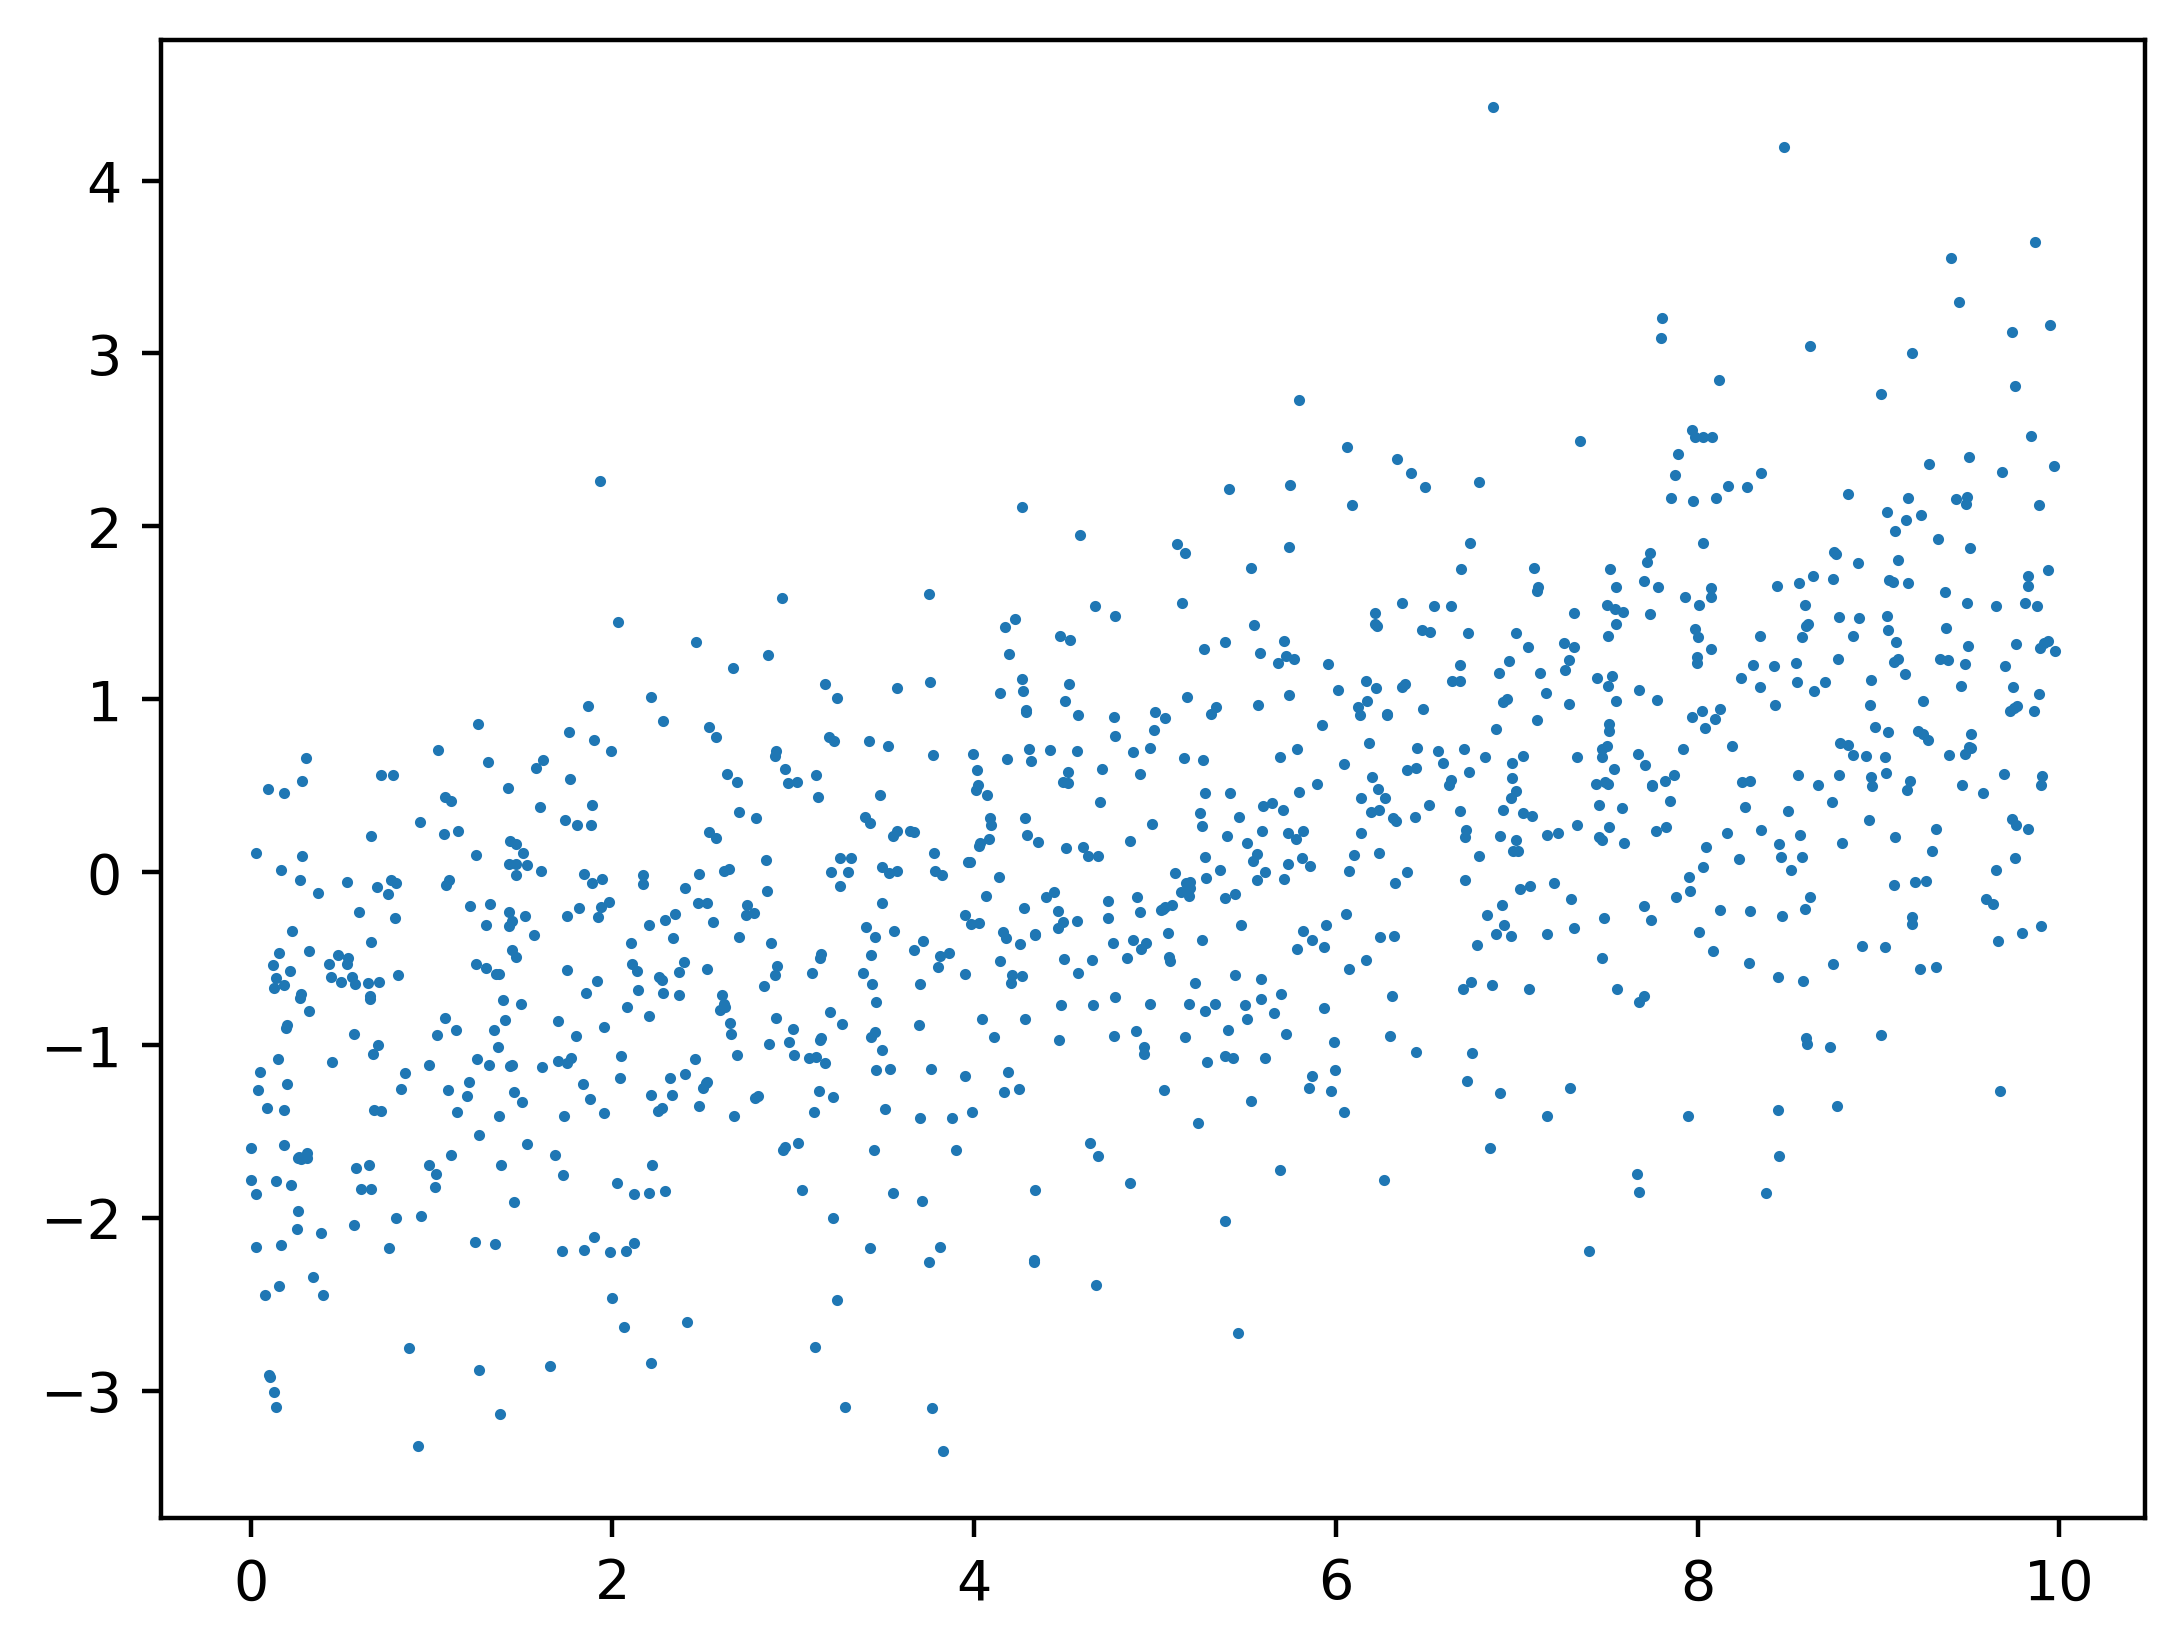

In [25]:
plt.scatter(X,y,s=1)

# Exercise 8: Linear regression in Scikit-Learn

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression()

In [28]:
lin_reg

LinearRegression()

In [29]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [30]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [31]:
y_pred = lin_reg.predict(X.reshape(-1,1))

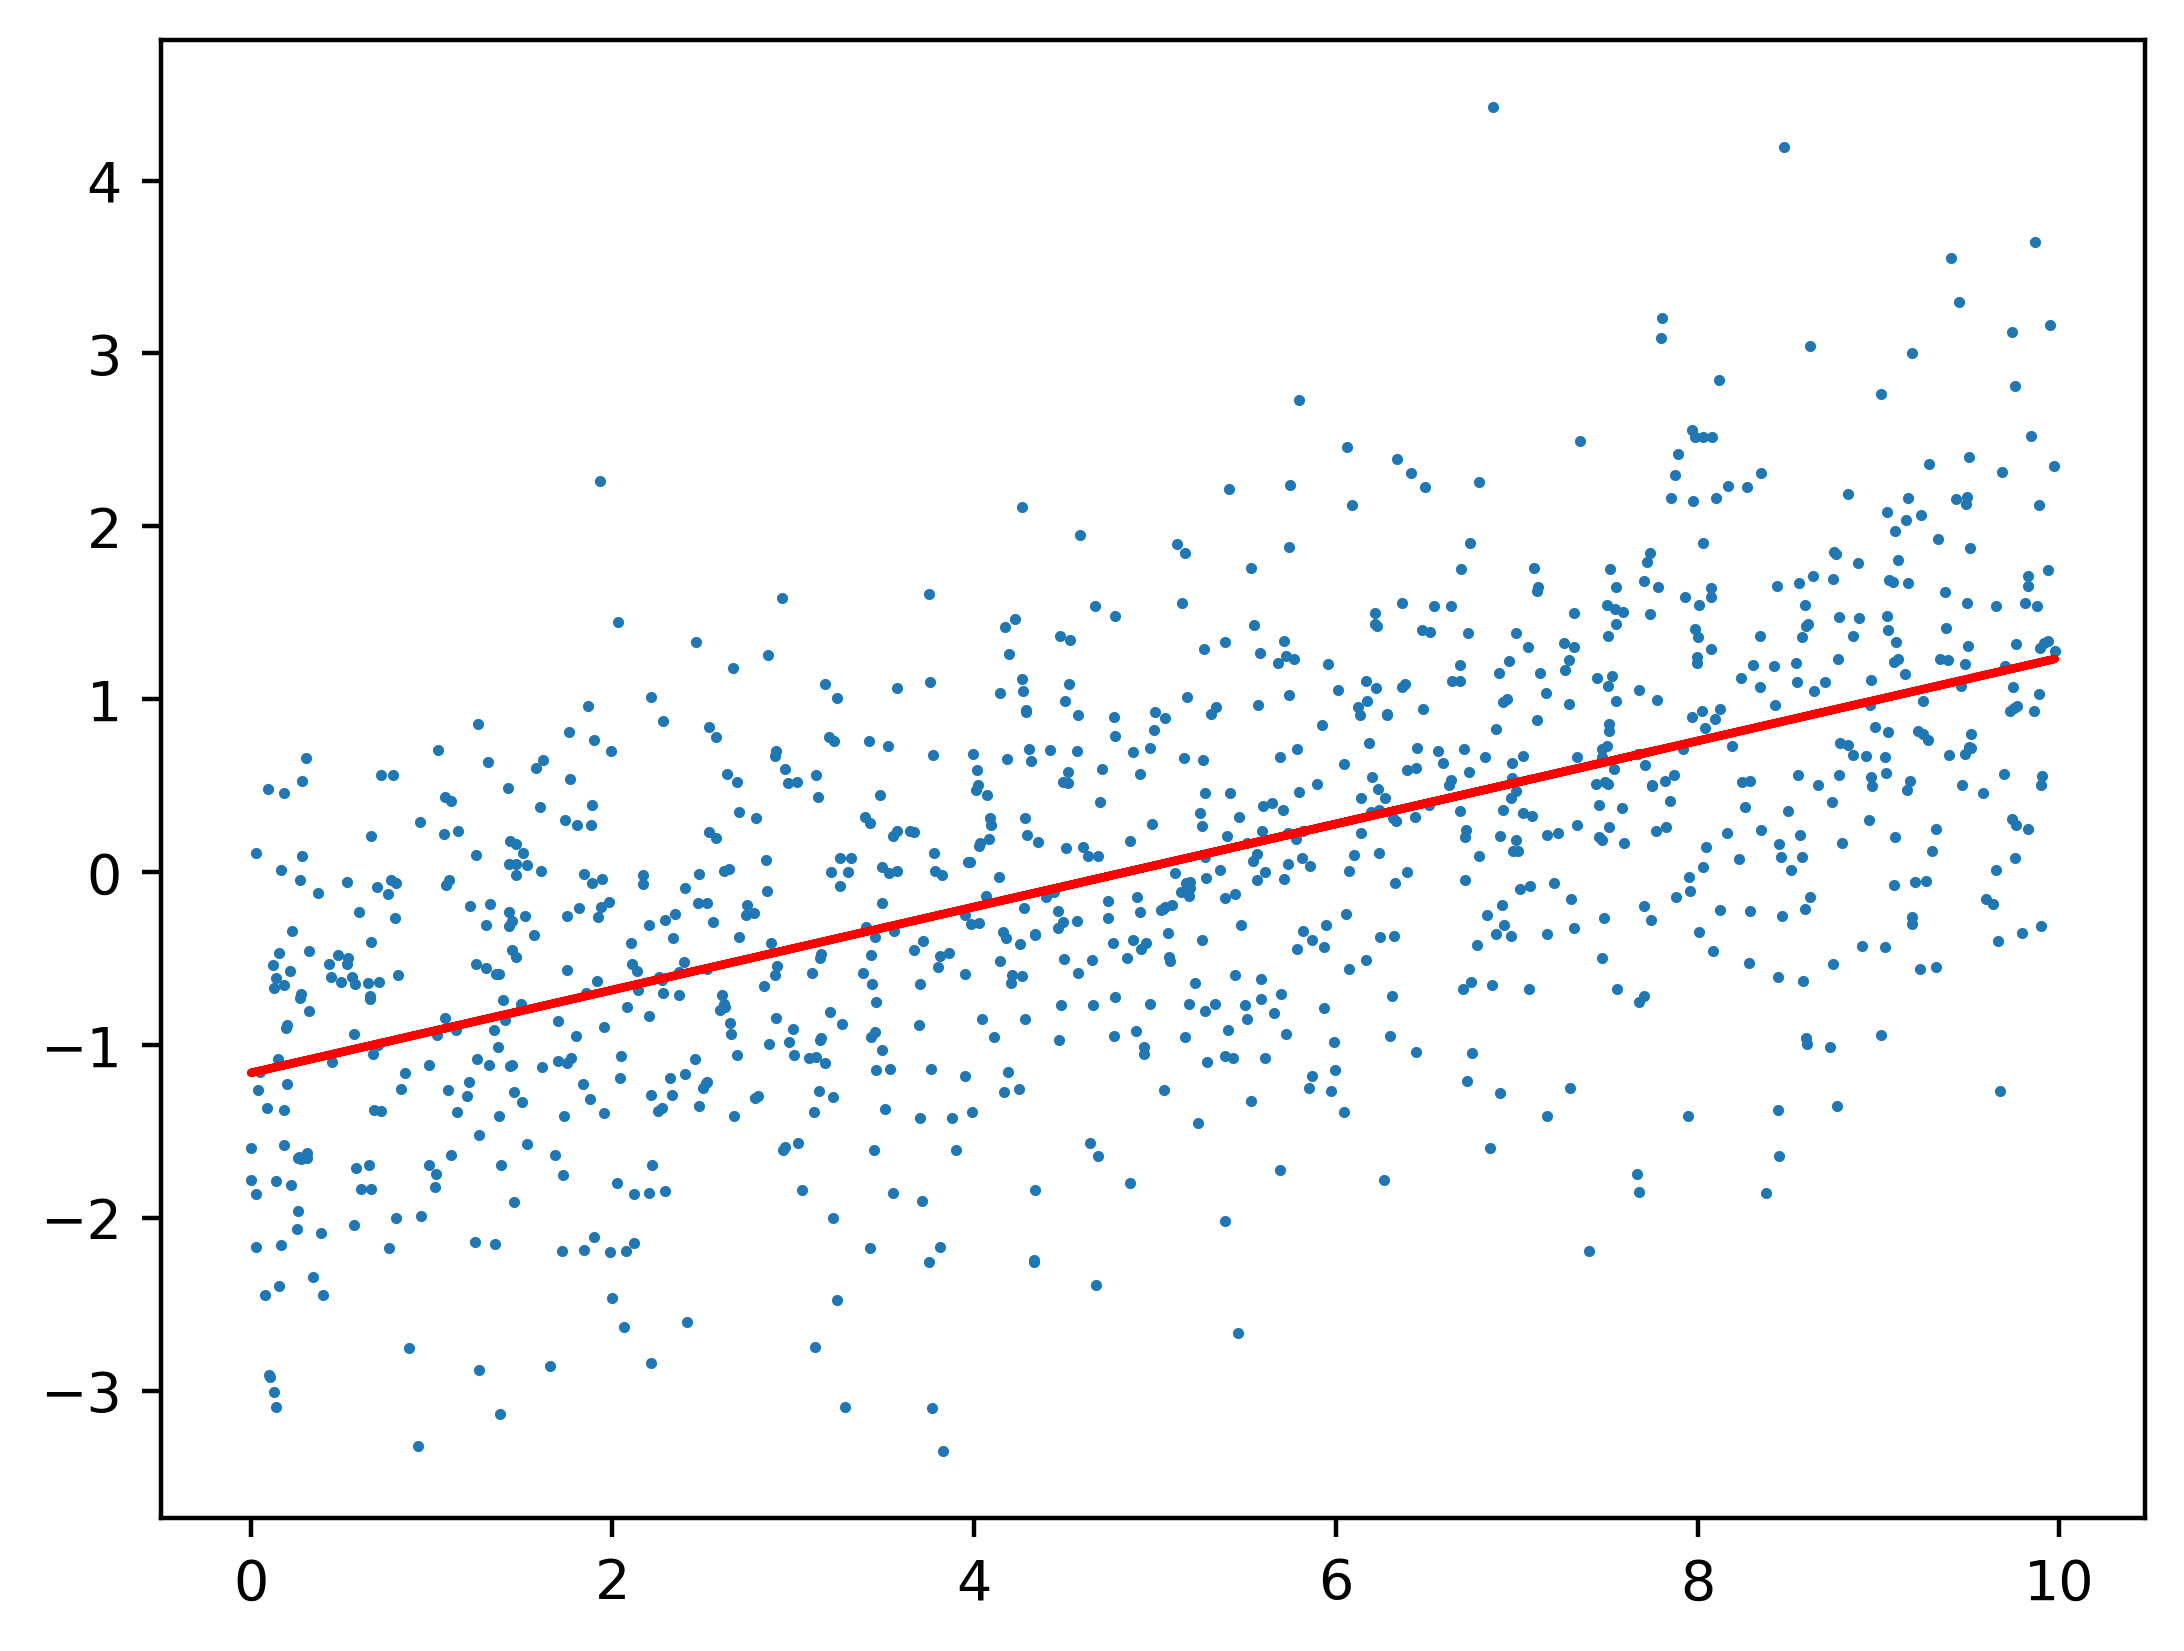

In [32]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

# Model performance metrics for binary classification
## Splitting the data: training and testing sets

Split the data in to training (80%) and testing (20%). Introduce metrics using testing scores.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [36]:
np.mean(y_train)

np.float64(0.223102526838873)

In [37]:
np.mean(y_test)

np.float64(0.21657603600225014)

## Classification accuracy

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [40]:
example_lr.fit(X_train, y_train)

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [41]:
y_pred = example_lr.predict(X_test)

Accuracy

In [42]:
is_correct = y_pred == y_test

In [43]:
np.mean(is_correct)

np.float64(0.7834239639977498)

In [44]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [45]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Exercise 9: Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [47]:
P = sum(y_test)
P

np.int64(1155)

In [48]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

np.int64(0)

In [49]:
TPR = TP/P
TPR

np.float64(0.0)

In [50]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

np.int64(1155)

In [51]:
FNR = FN/P
FNR

np.float64(1.0)

In [52]:
N = sum(y_test==0)
N

np.int64(4178)

In [53]:
TN = sum( (y_test==0) & (y_pred==0))
TN

np.int64(4178)

In [54]:
FP = sum( (y_test==0) & (y_pred==1))
FP

np.int64(0)

In [55]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [56]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

# Exercise 10: Obtaining Predicted Probabilities from a Trained Logistic Regression Model

In [57]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]], shape=(5333, 2))

In [58]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.], shape=(5333,))

In [59]:
prob_sum.shape

(5333,)

In [60]:
np.unique(prob_sum)

array([1.])

In [61]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085], shape=(5333,))

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

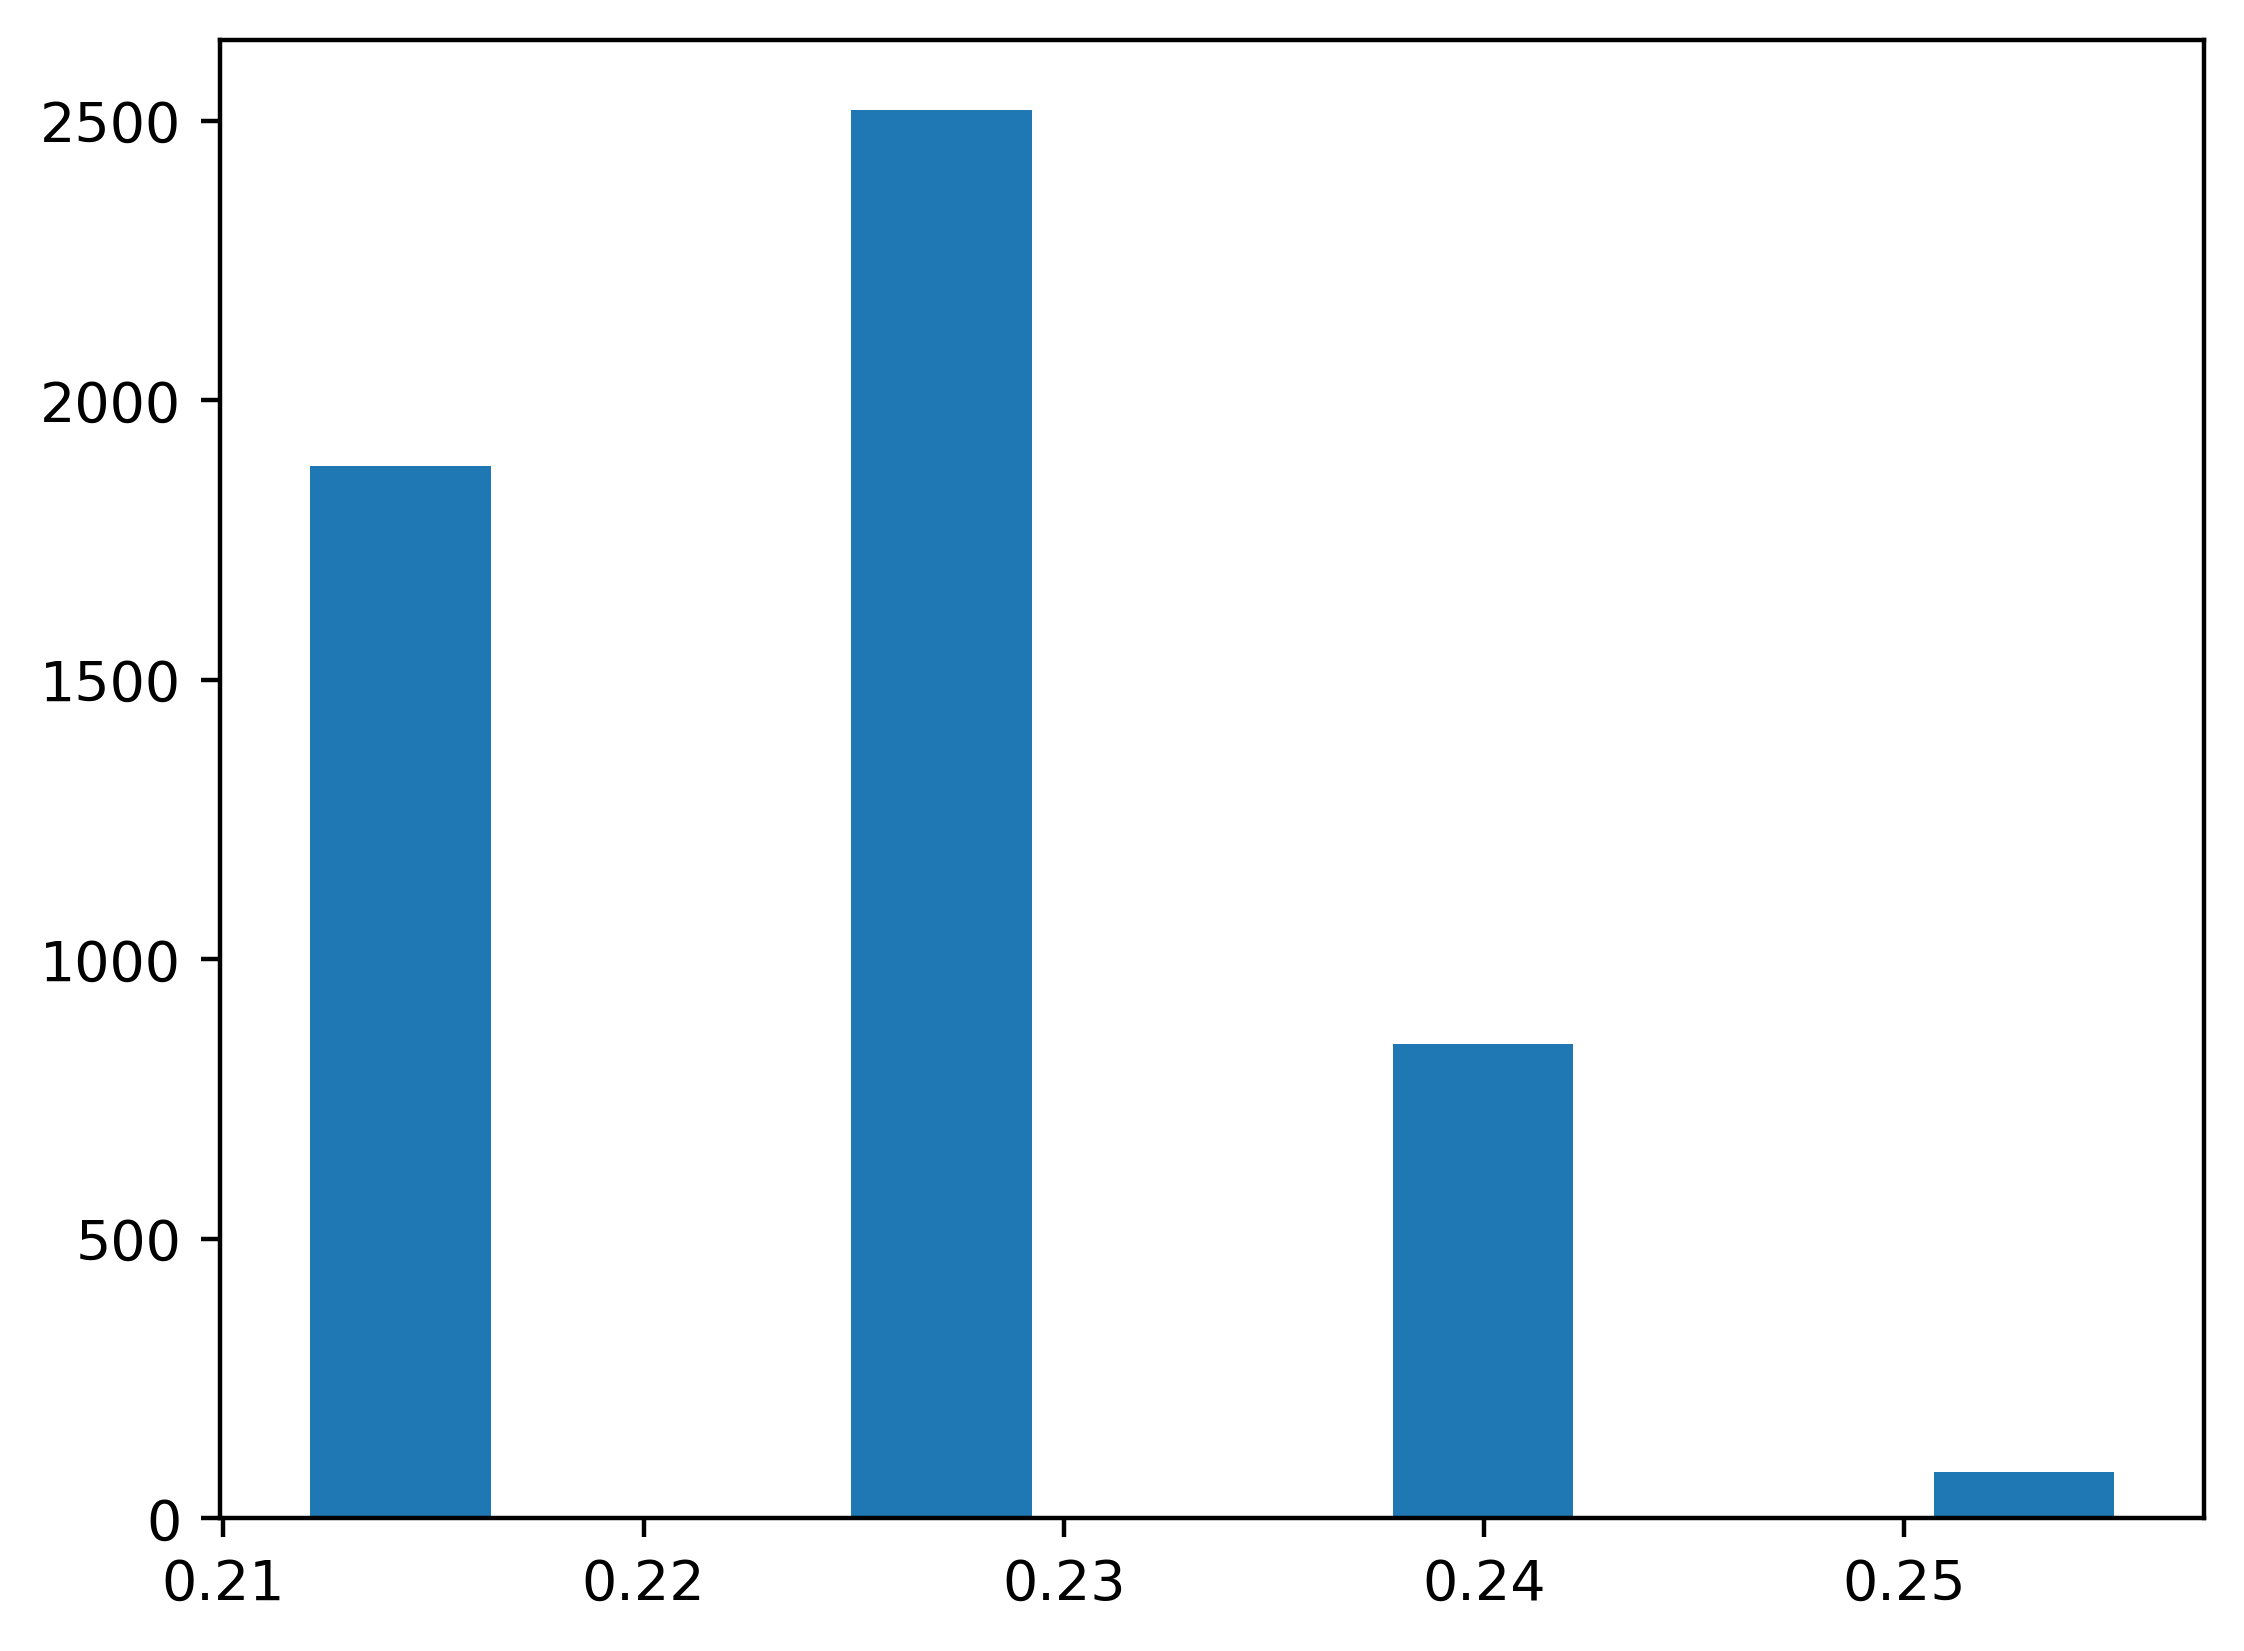

In [62]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

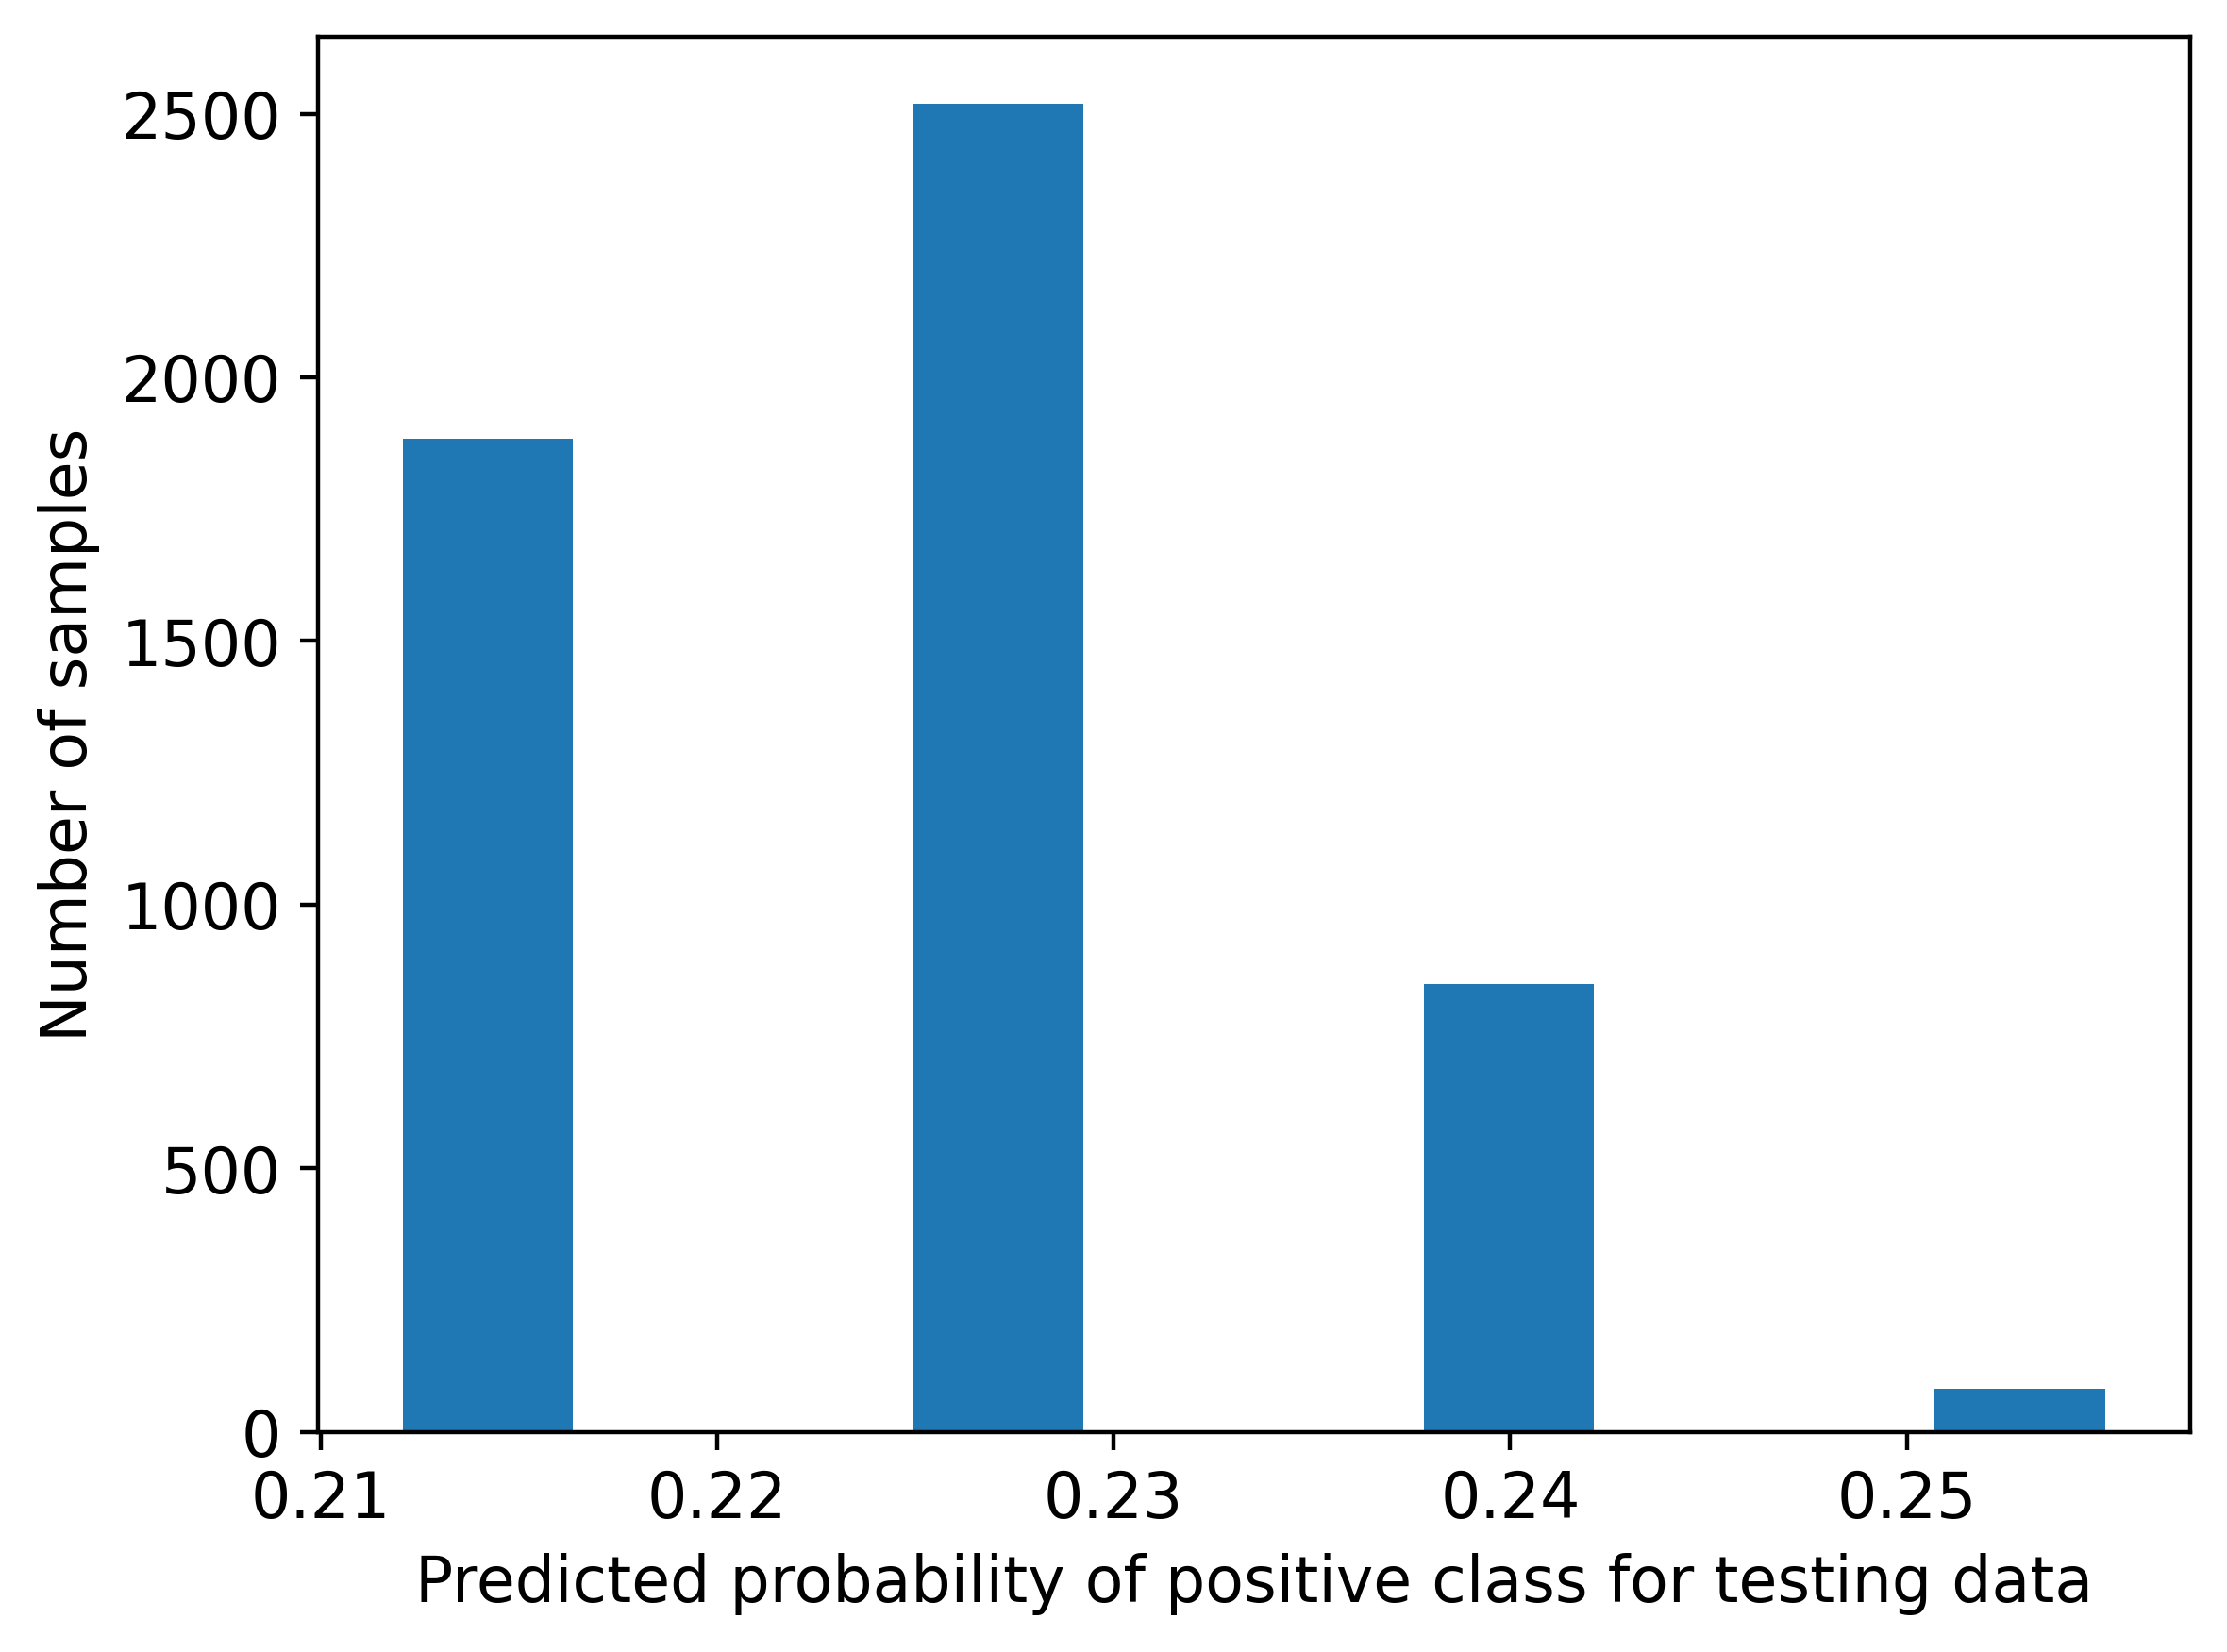

In [63]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [64]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

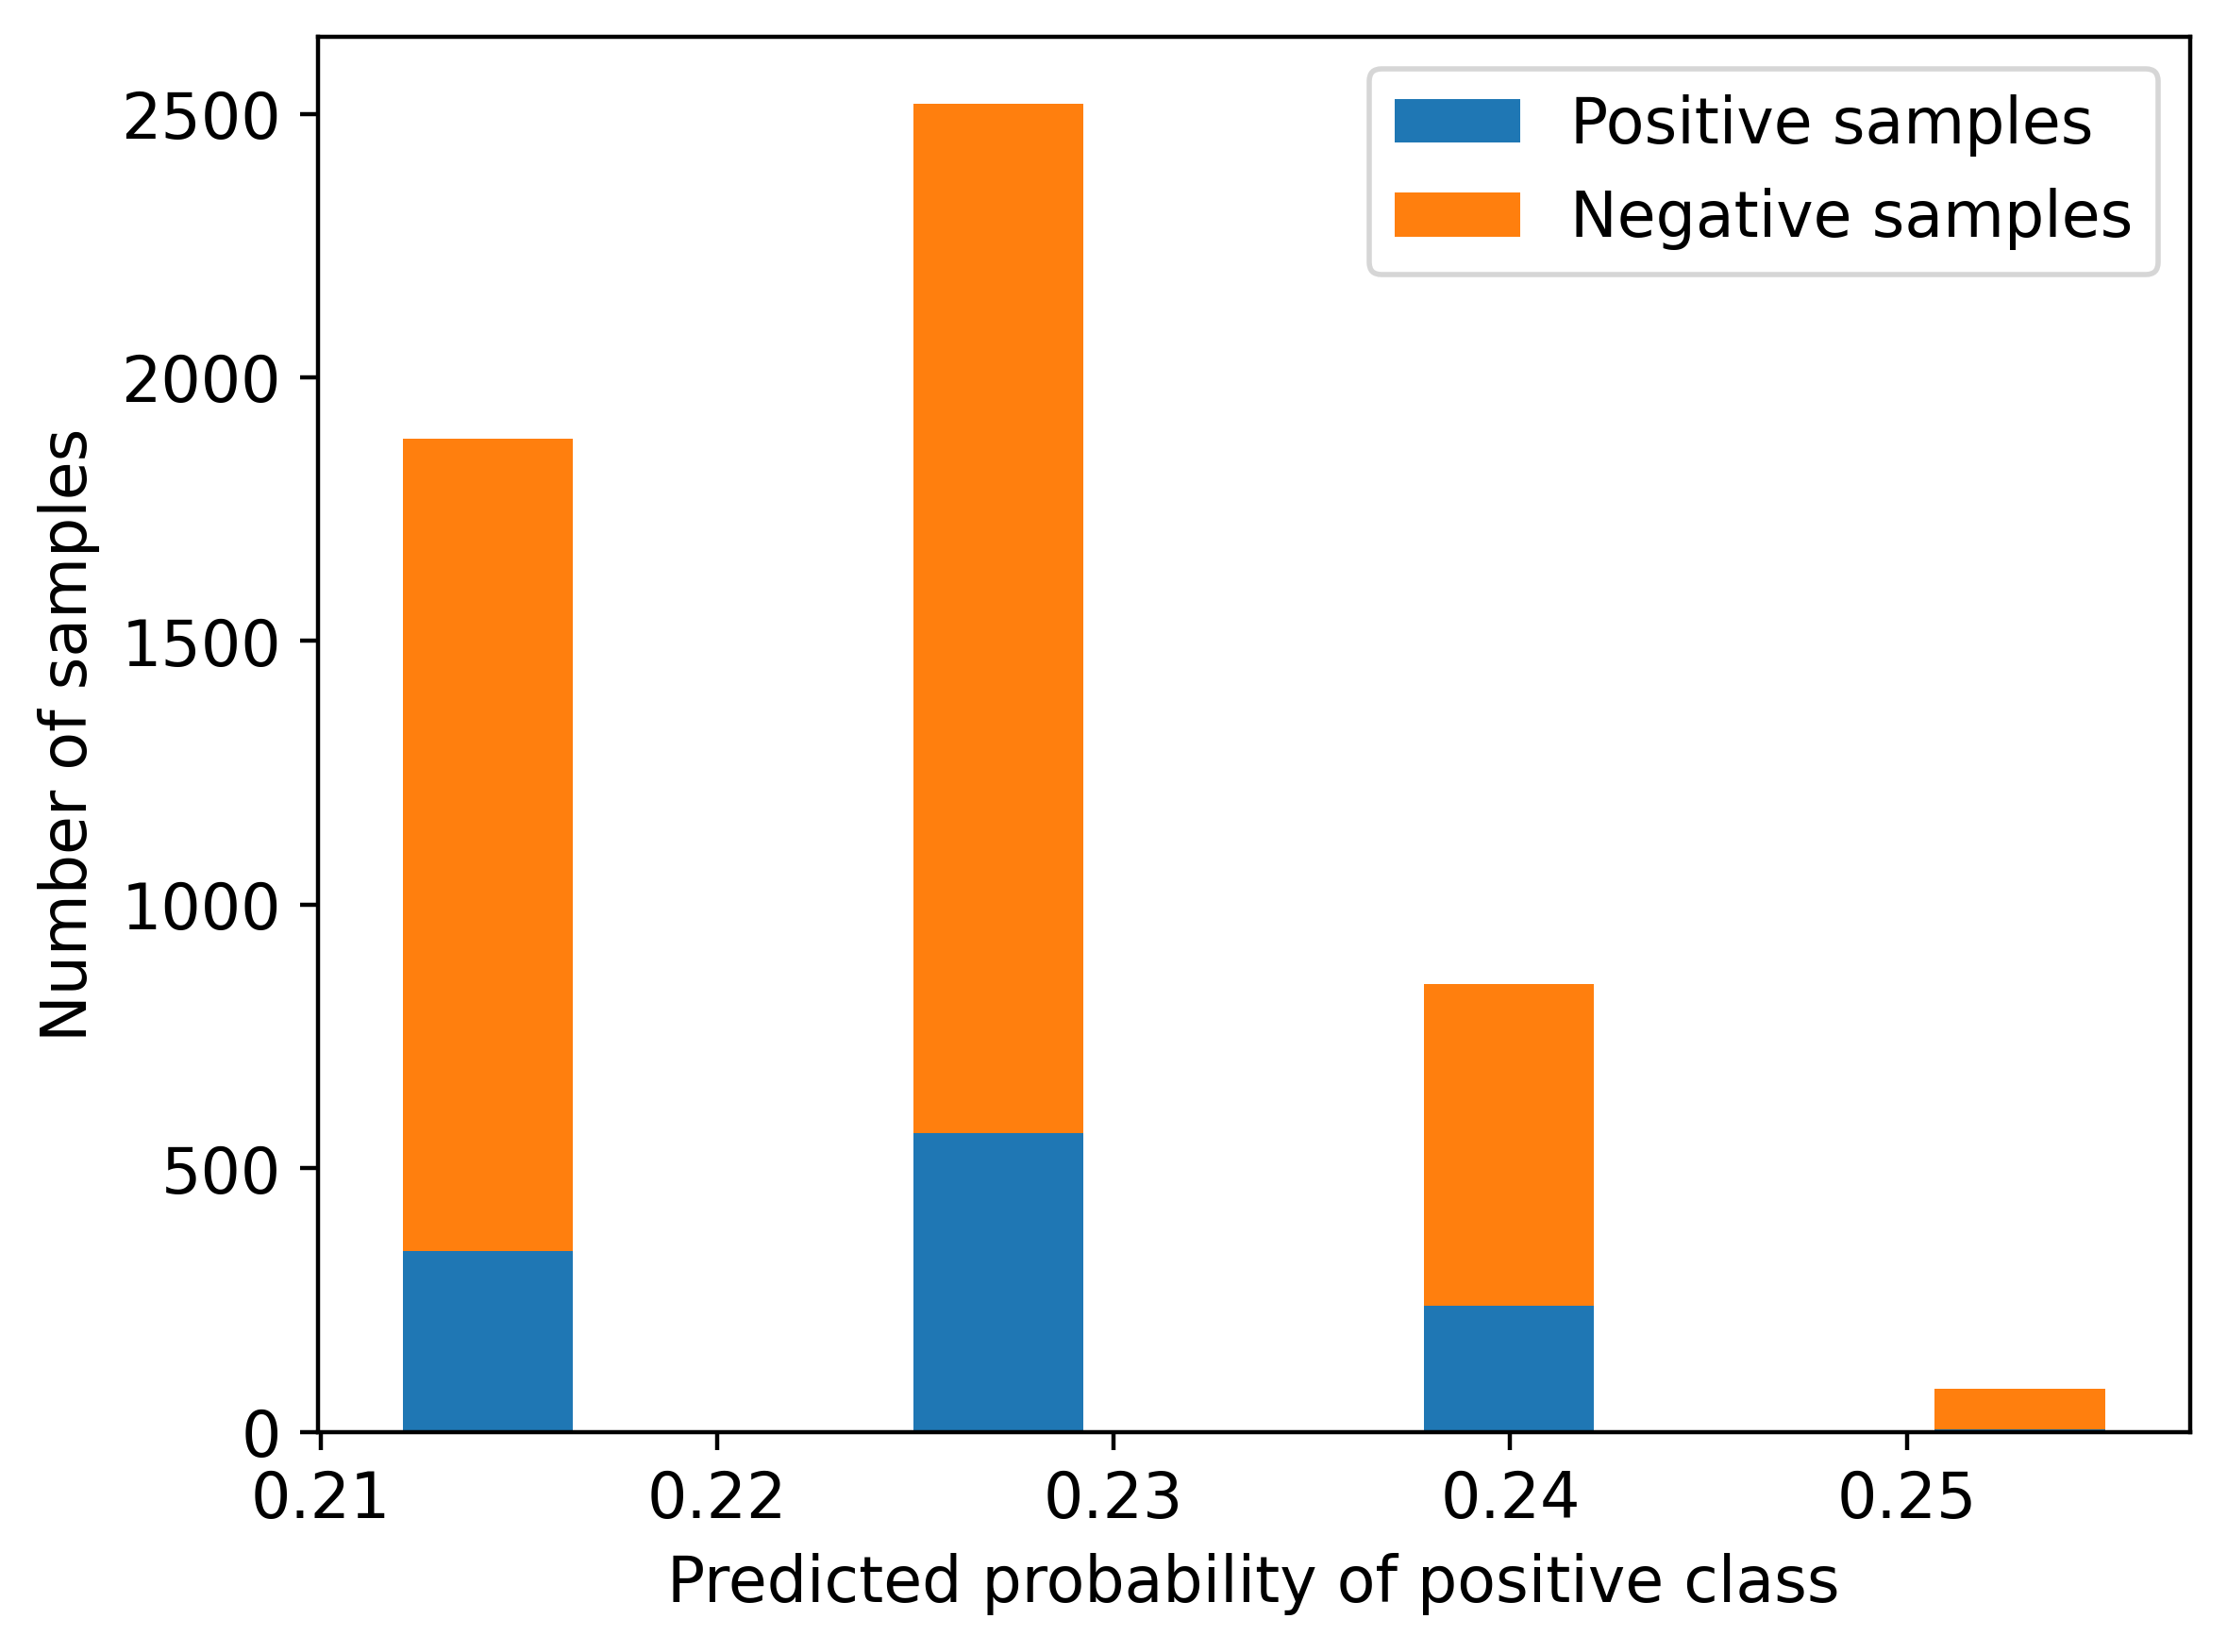

In [65]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

# The Receiver Operating Characteristic (ROC) curve

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

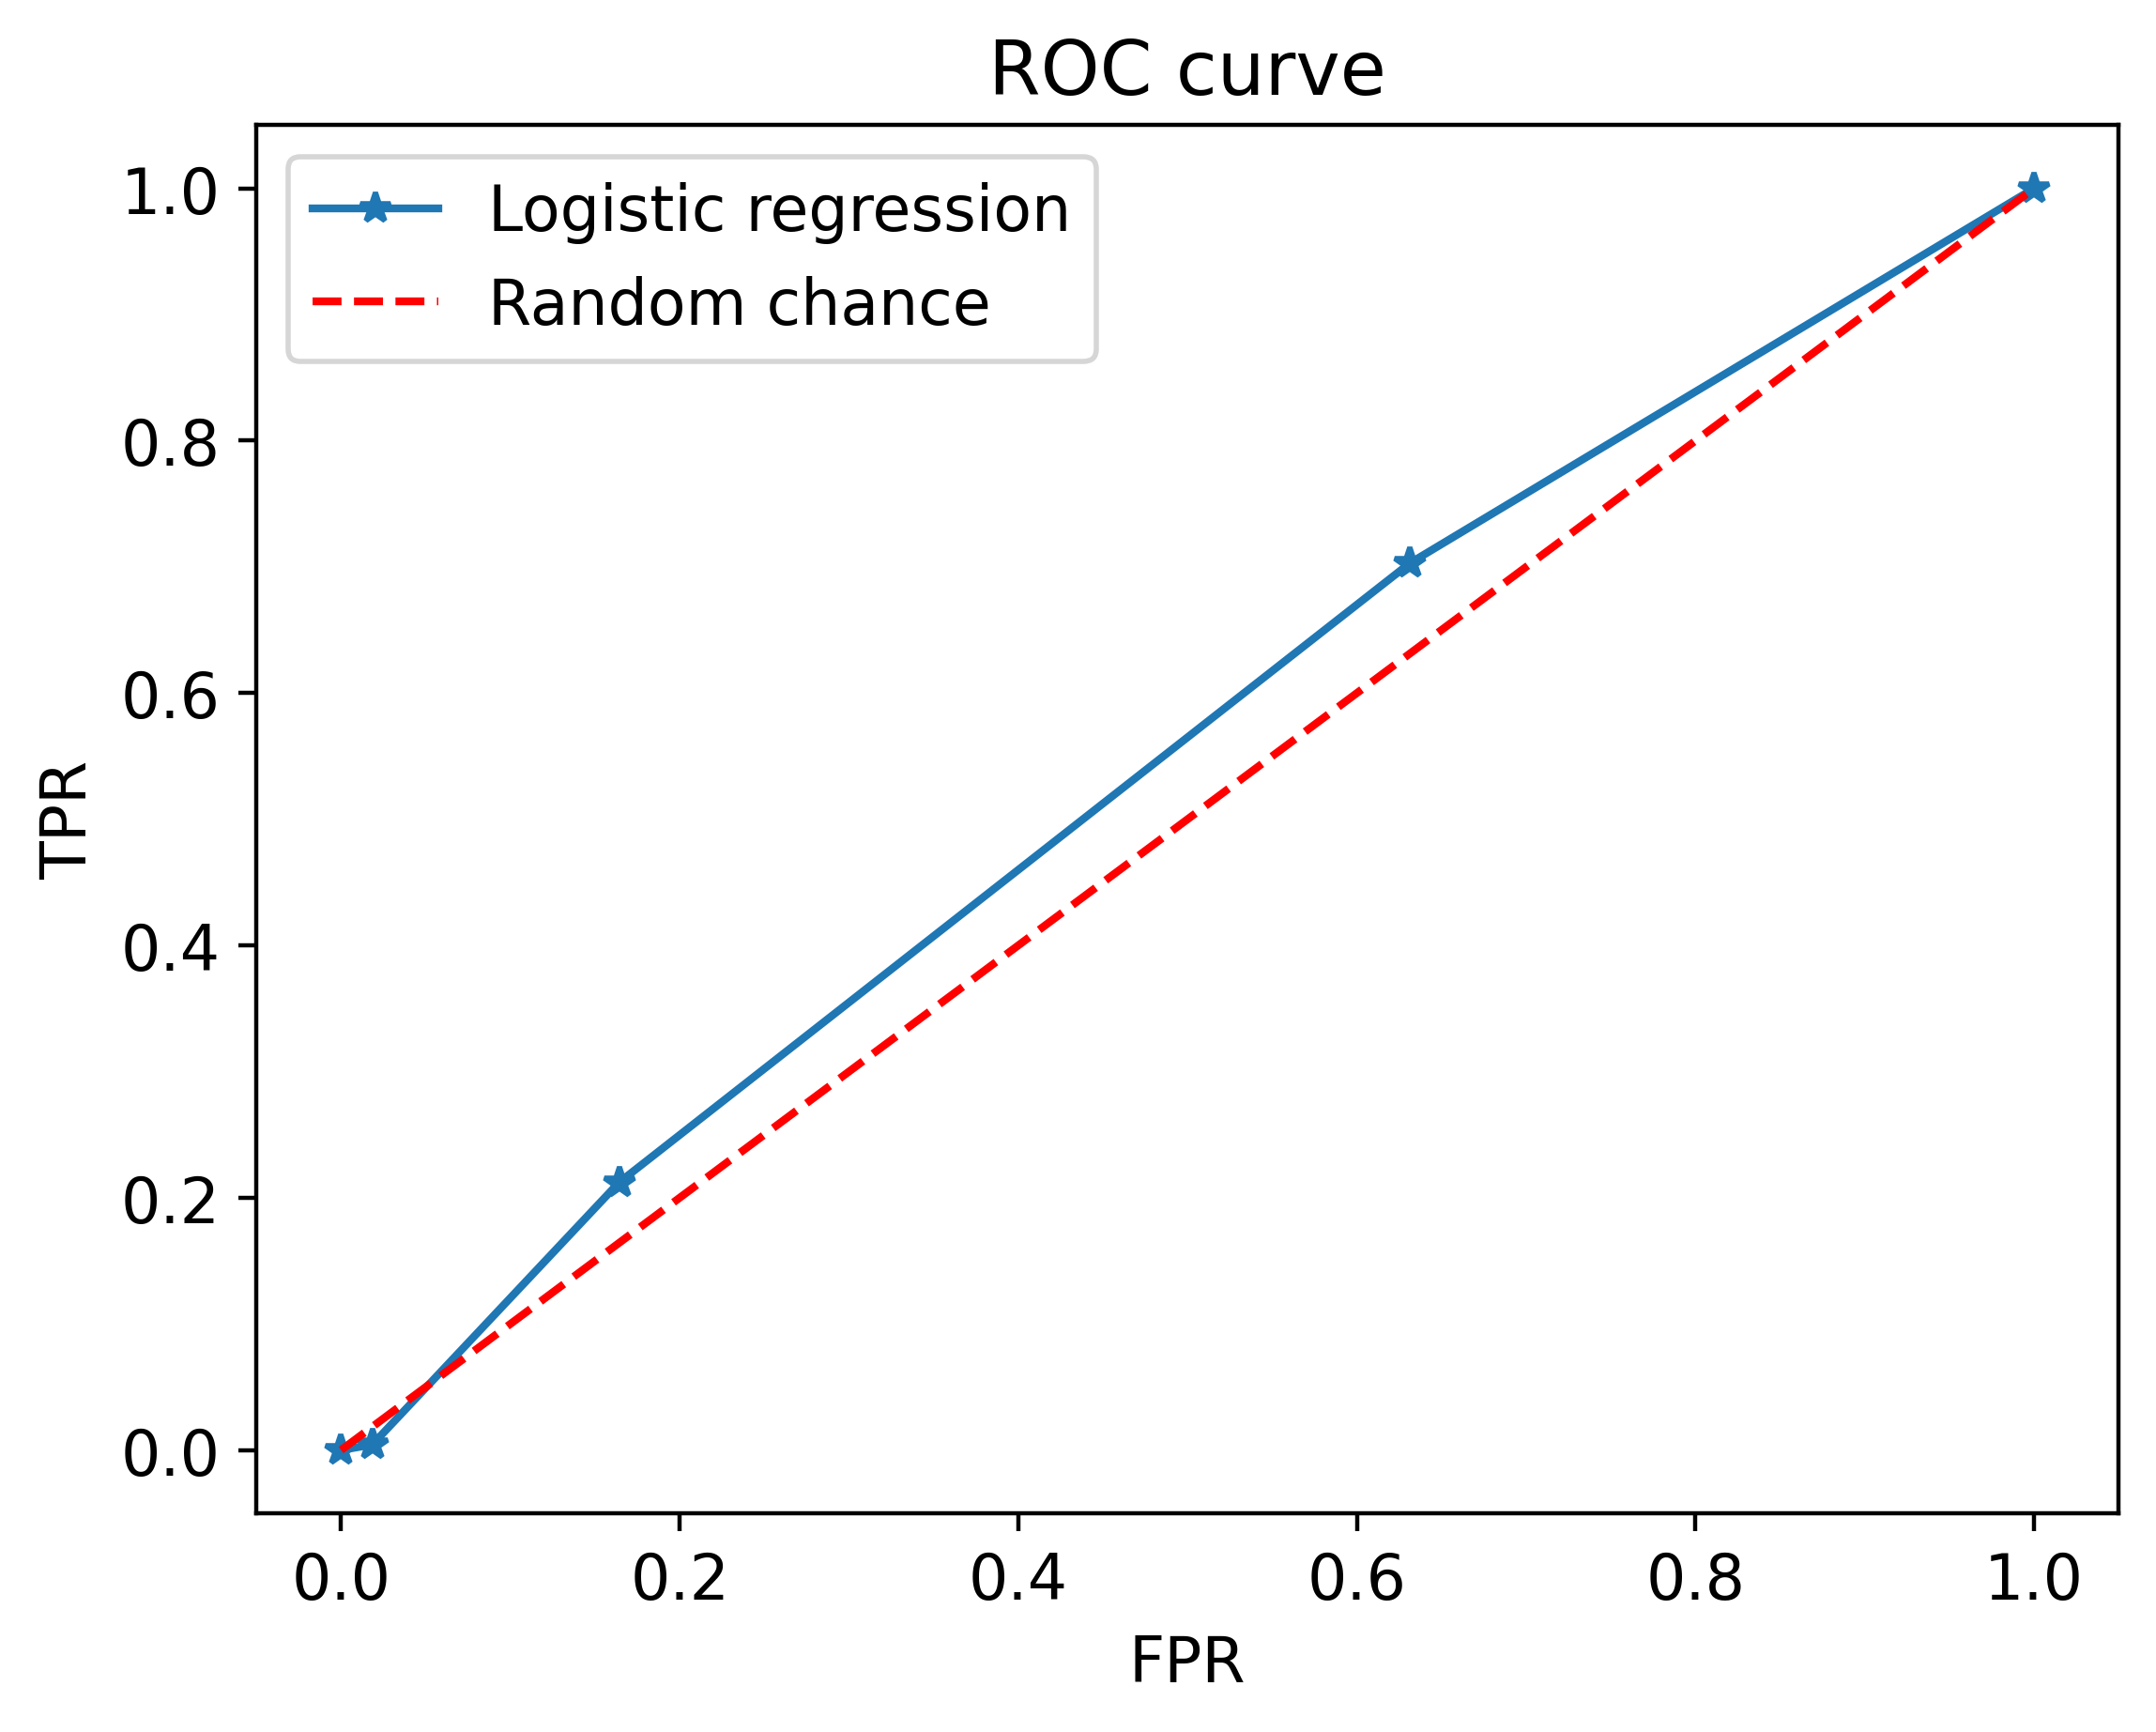

In [67]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [68]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [69]:
metrics.roc_auc_score(y_test, pos_proba)

np.float64(0.5434650477972642)

# Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [70]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [71]:
example_lr.fit(X_train_2, y_train_2)

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [72]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [73]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

np.float64(0.6201990844642832)

In [74]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

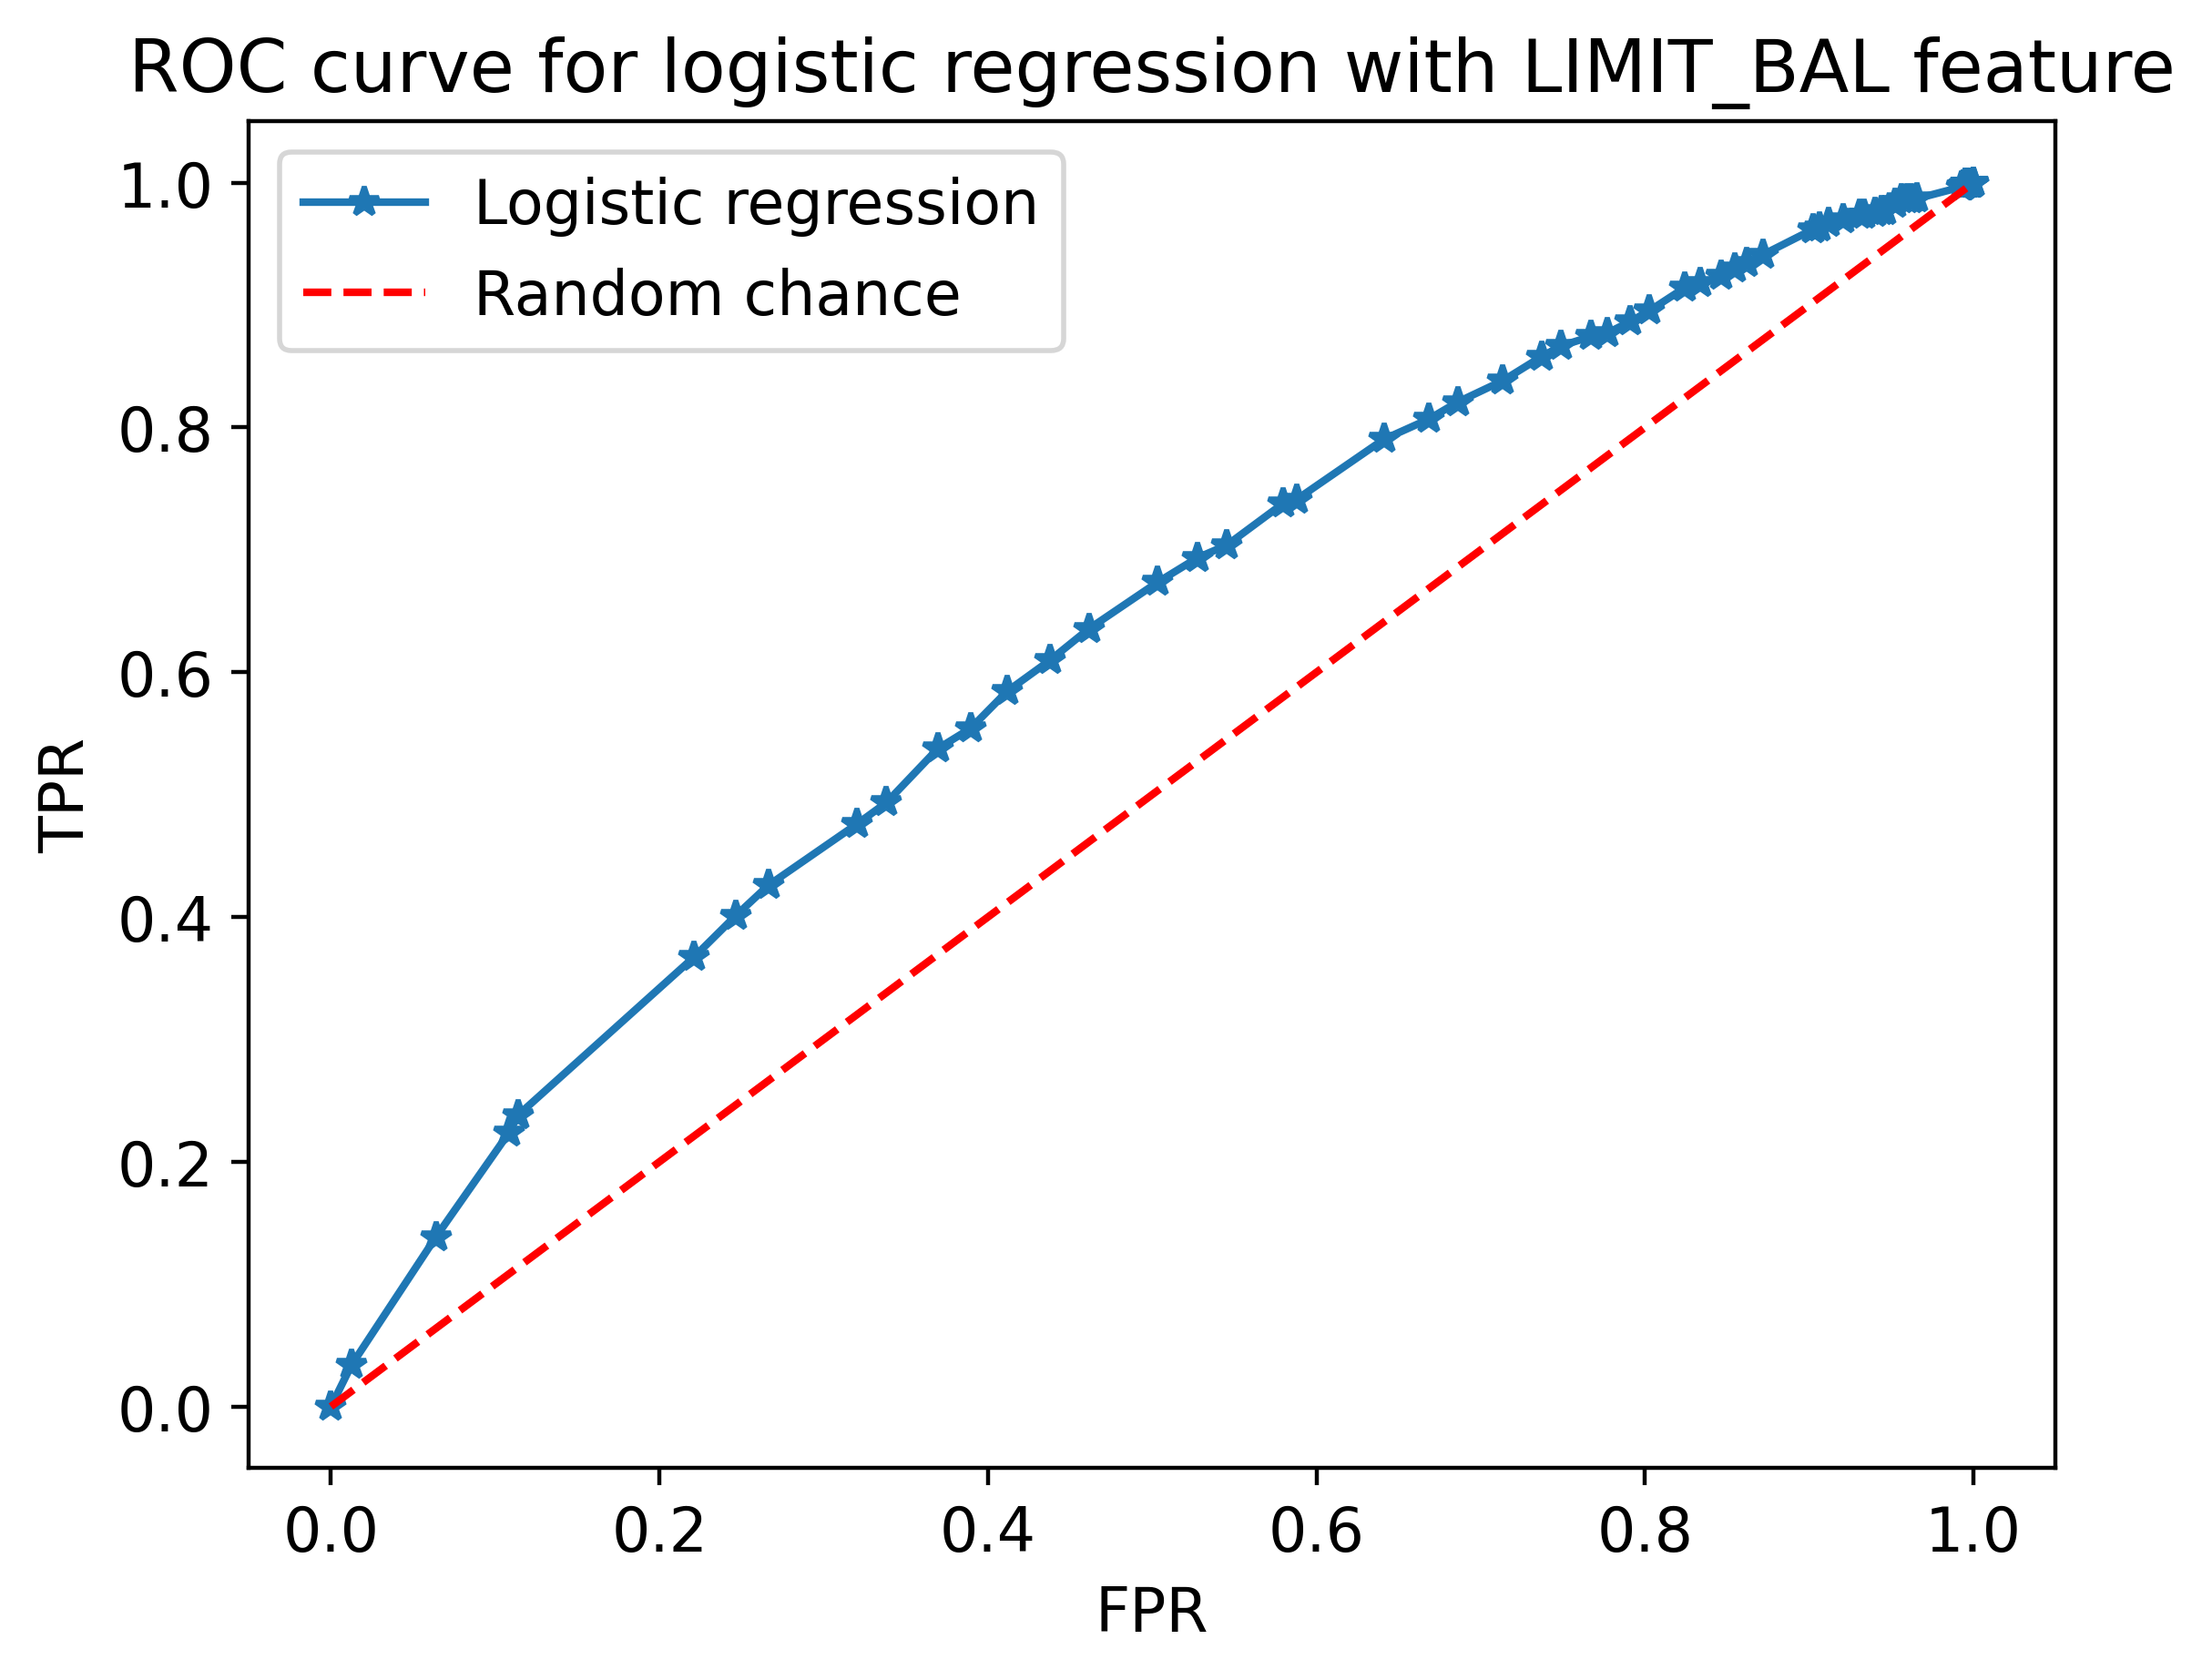

In [75]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [76]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

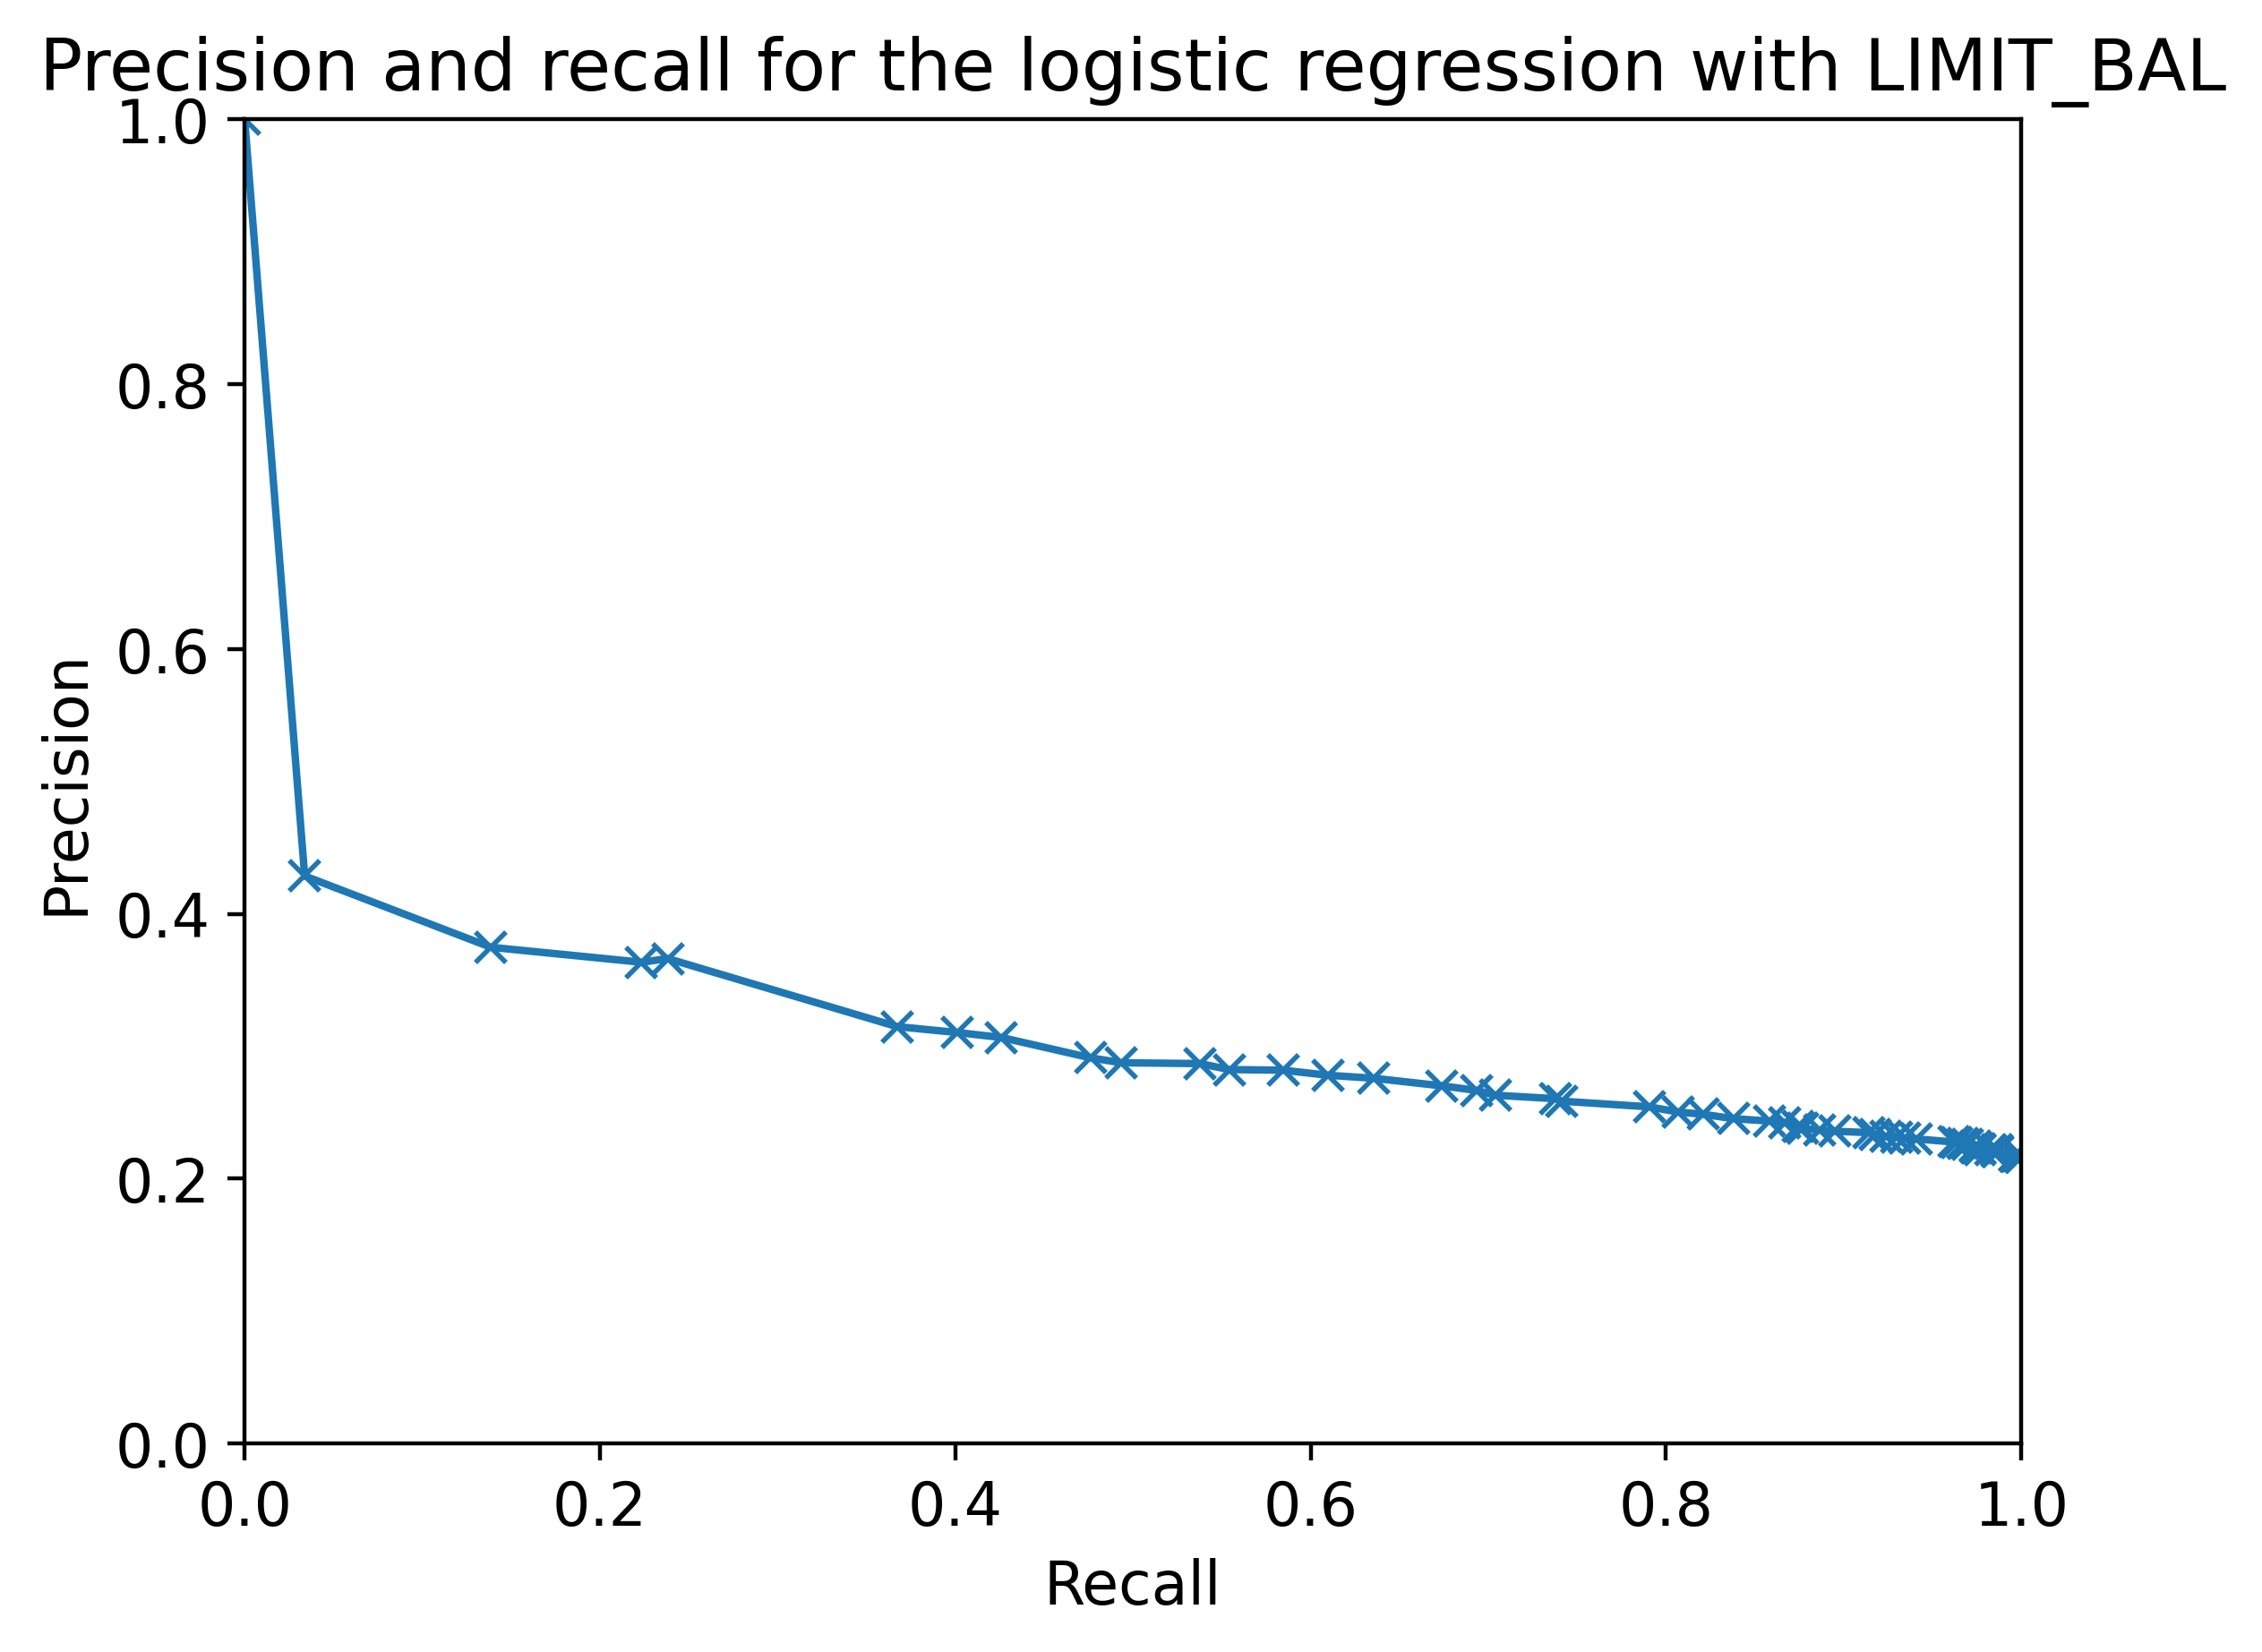

In [77]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [78]:
metrics.auc(recall, precision)

np.float64(0.31566964427378624)

In [79]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [80]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

np.float64(0.6182918113358344)